# **Fourier Transform**

In [254]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- **Low-pass filter** được sử dụng để loại bỏ nhiễu và giảm độ nét của hình ảnh hoặc tín hiệu.
Nó làm mờ hoặc làm giảm độ biến đổi nhanh chói trong ảnh hoặc tín hiệu, giúp tạo ra một phiên bản "mượt" và giảm nhiễu hơn của dữ liệu đầu vào.

- **High-pass filter** được sử dụng để tách ra các thành phần tần số cao (biến đổi nhanh) trong hình ảnh hoặc tín hiệu, trong khi loại bỏ các thành phần tần số thấp (biến đổi chậm). Nó thường được sử dụng để nổi bật các đặc điểm cụ thể hoặc cạnh trong hình ảnh hoặc tín hiệu.

**1. Low pass frequency by using Distance smooth function**

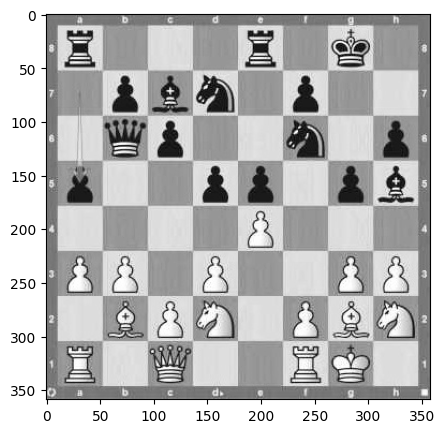

In [255]:
img = cv2.imread('chest.png')
#(1) chuyển sang gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (5, 5))
plt.imshow(gray, cmap = 'gray')

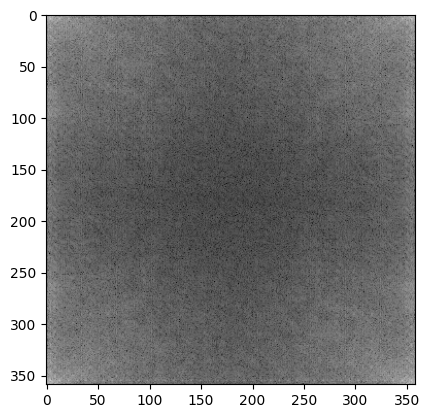

In [256]:
#(2) Fourier transformation
f= np.fft.fft2(gray)
plt.imshow(np.log(np.abs(f)), cmap ='gray')

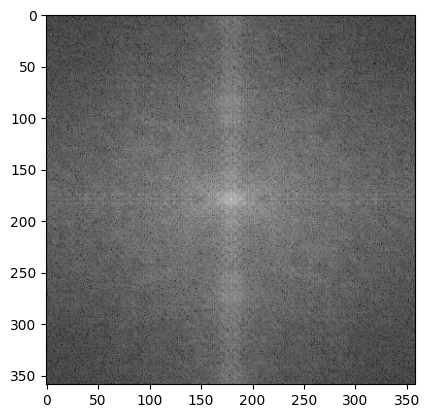

In [257]:
#(3) frequency shift
shifted_f = np. fft.fftshift(f)
plt.imshow(np.log(np.abs (shifted_f)),cmap ='gray')

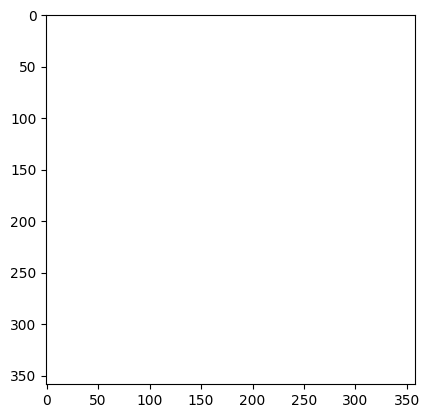

In [258]:
#(4a) low pass frequency
low_pass = np.ones (shape = gray.shape)
plt.imshow(low_pass, cmap = 'gray', vmax=1, vmin= 0)

<ipython-input-259-d0b0df90e730>:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(low_pass)), cmap ='gray')


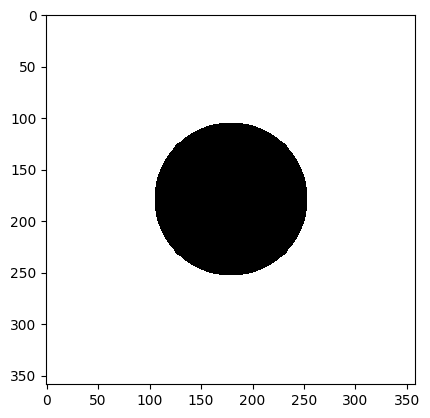

In [259]:
# (4b)
# lấy tâm bức ảnh
xc = gray.shape[1] // 2
yc = gray.shape[0] // 2
Do = 75
#bán kính :Do
# tính khoang cách từ 1 điểm đến tâm với công thức
# sqrt( (x-xc)**2 + (y-yc)**2)
def d(x, y):
  return np.sqrt((x-xc)**2+ (y-yc)**2)
for x in range (gray.shape[1]):
  for y in range (gray.shape[0]):
    if d(x,y) > Do:
      low_pass [y,x] = 0
f=shifted_f*low_pass
plt.imshow(np.log(np.abs(low_pass)), cmap ='gray')

<ipython-input-260-6c9184b88ca8>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(f)), cmap='gray')


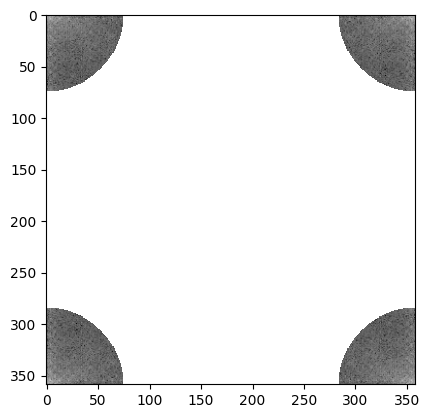

In [260]:
#(5) invert shift
f = np.fft.ifftshift(f)
plt.imshow(np.log(np.abs(f)), cmap='gray')

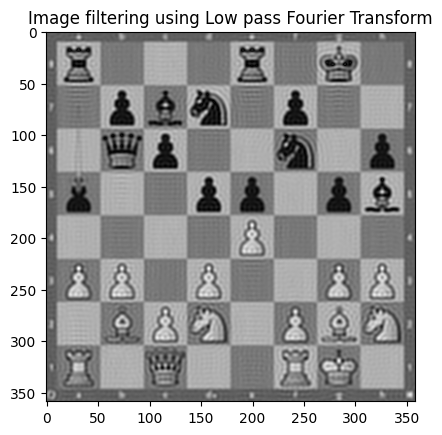

In [261]:
#(6) invert fourier transform
new_img_DSF = np.abs(np.fft.ifft2(f))
plt.title("Image filtering using Low pass Fourier Transform")
plt.imshow(new_img_DSF, cmap = 'gray')

**2. High pass frequency by using Distance smooth function**

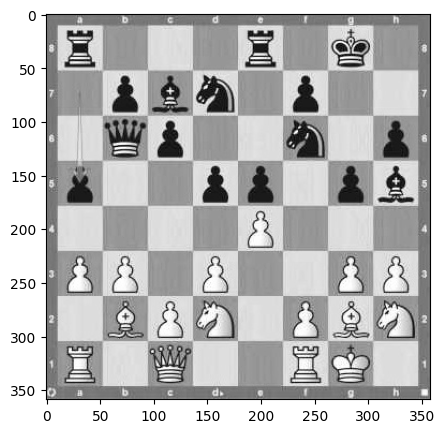

In [262]:
img = cv2.imread('chest.png')
#(1) chuyển sang gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (5, 5))
plt.imshow(gray, cmap = 'gray')

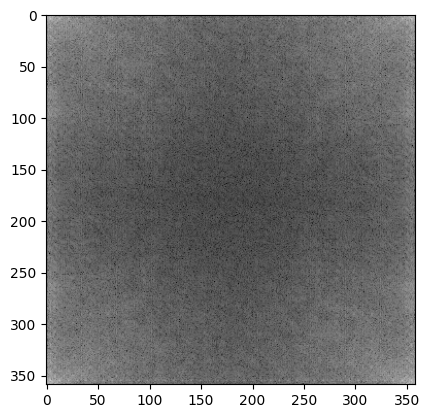

In [263]:
#(2) Fourier transformation
f= np.fft.fft2(gray)
plt.imshow(np.log(np.abs(f)), cmap ='gray')

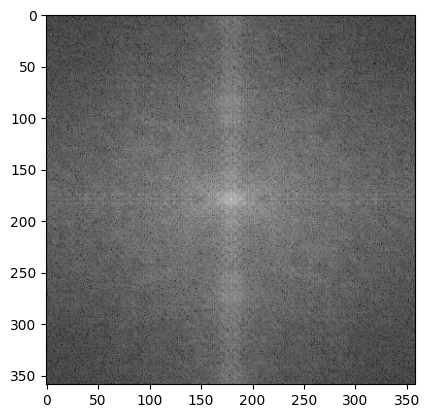

In [264]:
#(3) frequency shift
shifted_f = np. fft.fftshift(f)
plt.imshow(np.log(np.abs (shifted_f)),cmap ='gray')

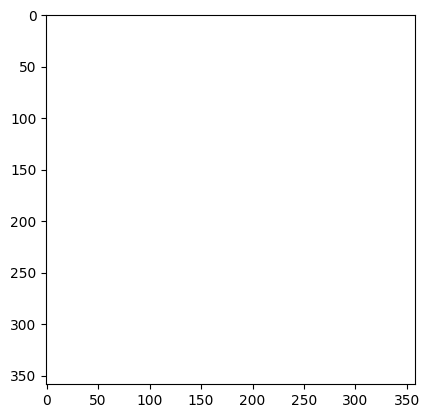

In [265]:
#(4a) high pass frequency
high_pass = np.ones (shape = gray.shape)
plt.imshow(high_pass, cmap = 'gray', vmax=1, vmin= 0)

<ipython-input-266-421bbb4168ea>:16: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(high_pass)), cmap ='gray')


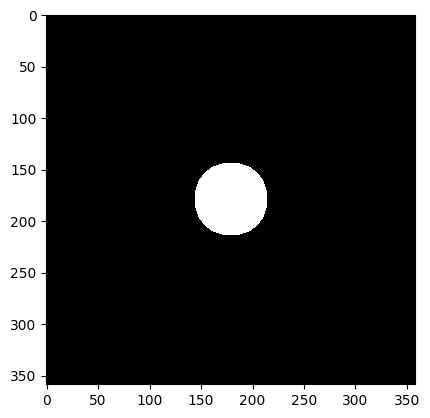

In [266]:
# (4b)
# lấy tâm bức ảnh
xc = gray.shape[1] // 2
yc = gray.shape[0] // 2
Do = 35
#bán kính :Do
# tính khoang cách từ 1 điểm đến tâm với công thức
# sqrt( (x-xc)**2 + (y-yc)**2)
def d(x, y):
  return np.sqrt((x-xc)**2+ (y-yc)**2)
for x in range (gray.shape[1]):
  for y in range (gray.shape[0]):
    if d(x,y) < Do:
      high_pass [y,x] = 0
f=shifted_f*high_pass
plt.imshow(np.log(np.abs(high_pass)), cmap ='gray')

<ipython-input-267-6c9184b88ca8>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(f)), cmap='gray')


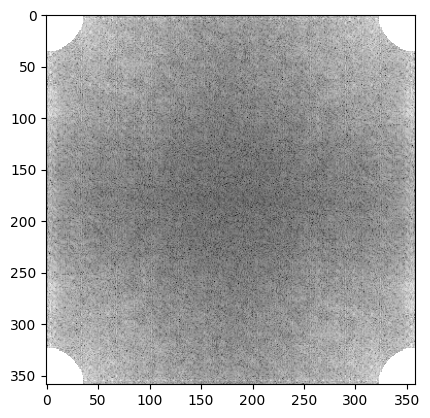

In [267]:
#(5) invert shift
f = np.fft.ifftshift(f)
plt.imshow(np.log(np.abs(f)), cmap='gray')

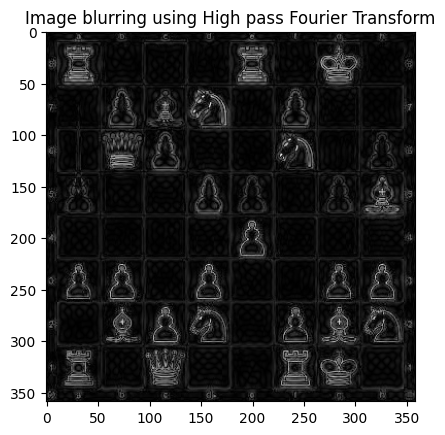

In [268]:
#(6) invert fourier transform
new_img = np.abs (np.fft.ifft2(f))
plt.title("Image blurring using High pass Fourier Transform")
plt.imshow(new_img, cmap = 'gray')

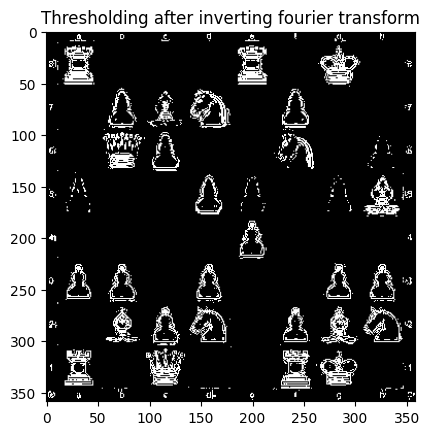

In [269]:
# Đặt ngưỡng
thresh = 47

# Sử dụng hàm cv2.threshold() để loại bỏ những điểm có độ sáng nhỏ hơn ngưỡng
ret, thresh_img_DSF = cv2.threshold(new_img, thresh, 255, cv2.THRESH_BINARY)

# Hiển thị ảnh sau khi đã áp dụng ngưỡng
plt.title("Thresholding after inverting fourier transform")
plt.imshow(thresh_img_DSF, cmap = 'gray')

In [270]:
# # Erosion followed by dilation để lọc gợn ảnh
# kernel = np.ones((2,1),np.uint8) # Lọc theo chiều ngang
# opening1 = cv2.morphologyEx(thresh_img_DSF, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((1,2),np.uint8) # Lọc theo chiều dọc
# opening2 = cv2.morphologyEx(thresh_img_DSF, cv2.MORPH_OPEN, kernel)
# # Cộng 2 ảnh vừa lọc
# opening_DSF = cv2.addWeighted(opening1, 0.5, opening2, 0.5, 0.0)
# plt.title("Erosion followed by dilation")
# plt.imshow(opening_DSF, cmap = 'gray')

**Draw frequency curves and plot 3D function**

<function matplotlib.pyplot.legend(*args, **kwargs)>

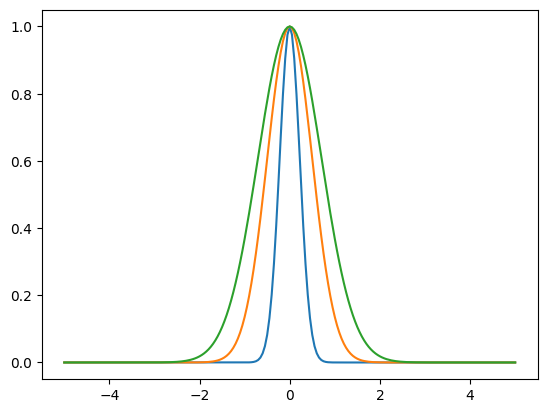

In [271]:
for sigma in [0.1, 0.5, 1.0]:
  x = np.linspace (-5, 5, 201)
  y = np.exp(-x**2 / sigma)
  plt.plot(x,y, label="".format(sigma))
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

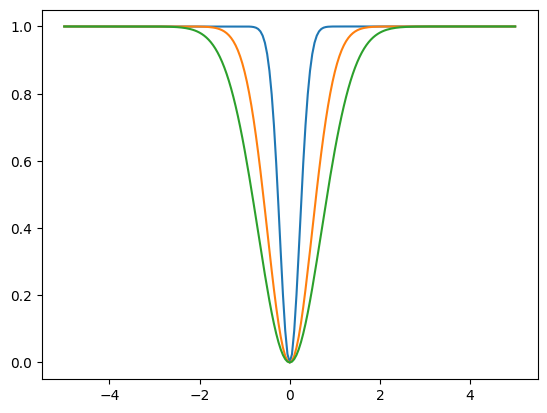

In [272]:
for sigma in [0.1, 0.5, 1.0]:
  x = np. linspace (-5, 5, 201)
  y = 1 - np.exp(-x**2 / sigma)
  plt.plot(x,y, label = "".format(sigma))
plt.legend

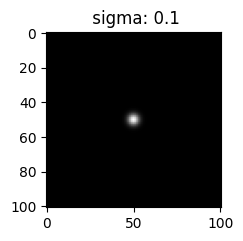

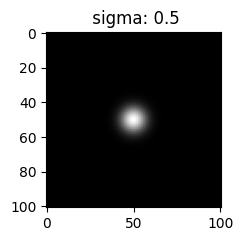

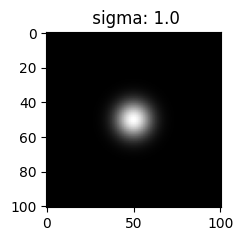

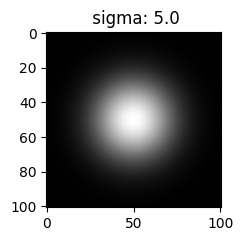

In [273]:
#plot 3D funtion y = exp(-(x**2 + y**2) / sigma)
x= np.linspace (-5,5,101)
y = np.linspace (-5,5,101)
X, Y = np.meshgrid(x, y)
for i, sigma in enumerate([0.1, 0.5, 1.0, 5.0]):
  z = np.exp(-(X**2+ Y**2) / sigma)
  plt.figure(figsize = (5,5))
  plt.subplot(2,2,i+1)
  plt.imshow(z, cmap = 'gray')
  plt.title(f" sigma: {sigma}")

**3. Low pass frequency by using Gaussian smooth function**

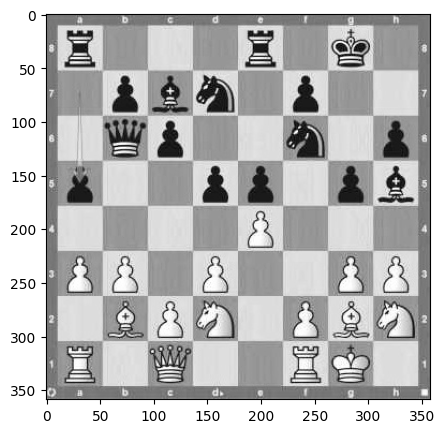

In [274]:
img = cv2.imread('chest.png')
#(1) chuyển sang gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (5, 5))
plt.imshow(gray, cmap = 'gray')

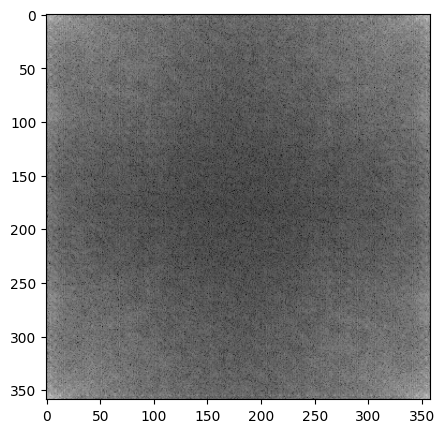

In [275]:
#(2) Fourier transformation
f= np.fft.fft2(gray)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs (f)), cmap ='gray')

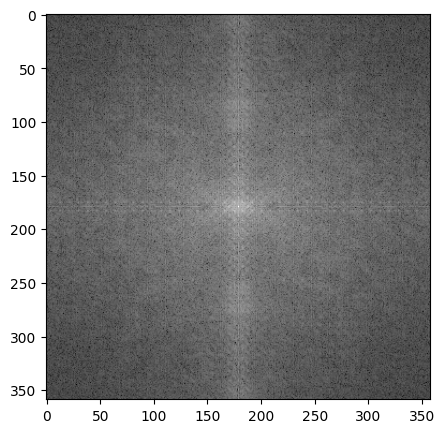

In [276]:
#(3) frequency shift
shifted_f = np. fft.fftshift(f)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs (shifted_f)), cmap='gray')

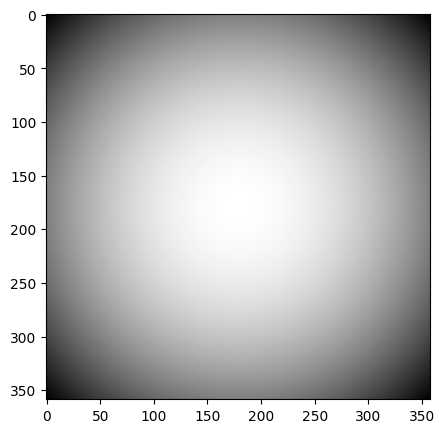

In [277]:
#(4) low pass frequency
low_pass = np.ones(shape = gray.shape)
#láy tâm bức anh
xc = gray.shape[0] // 2
yc = gray.shape[1] // 2
#bán kính :Do
sigma = 75
#tính khoảng cách từ 1 điểm đến tâm với công thức : # sqrt( (x-xc)**2 + (y-yc)**2)
def d(x, y):
  return np.sqrt((x-xc)**2+ (y-yc)**2)
for x in range (gray.shape[0]):
  for y in range (gray.shape[1]):
    low_pass [x,y] = np.exp(-d(x, y) **2 / (2*sigma**2))
f= shifted_f*low_pass
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs (low_pass)), cmap = 'gray')

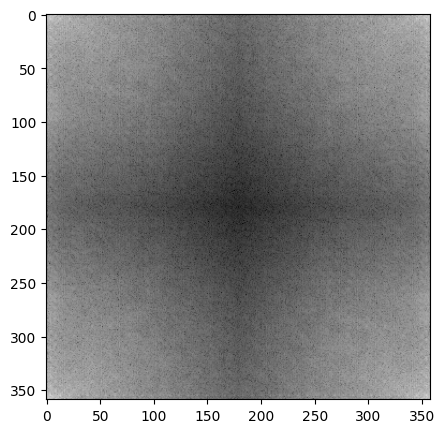

In [278]:
#(5) invert shift
plt.figure(figsize = (5, 5))
f = np.fft.ifftshift(f)
plt.imshow(np.log(np.abs (f)), cmap='gray')

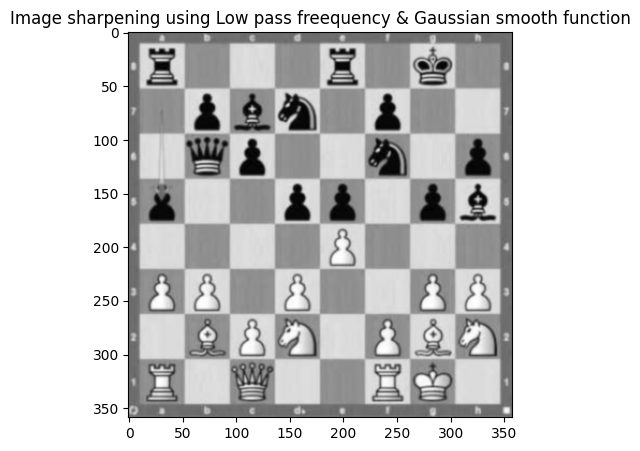

In [279]:
#(6) invert fourier transform
new_img_GSF = np.abs (np.fft.ifft2(f))
plt.figure(figsize = (5, 5))
plt.title("Image sharpening using Low pass freequency & Gaussian smooth function")
plt.imshow(new_img_GSF, cmap = 'gray')

**4. High pass frequency by using Gaussian smooth function**

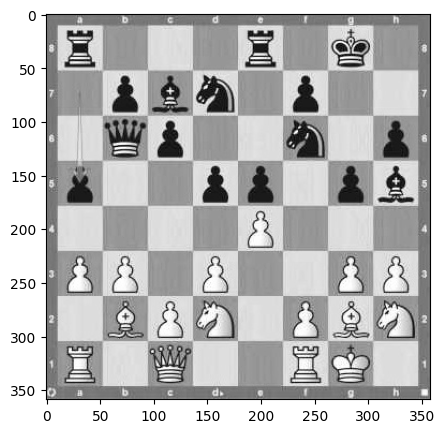

In [280]:
img = cv2.imread('chest.png')
#(1) chuyển sang gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (5, 5))
plt.imshow(gray, cmap = 'gray')

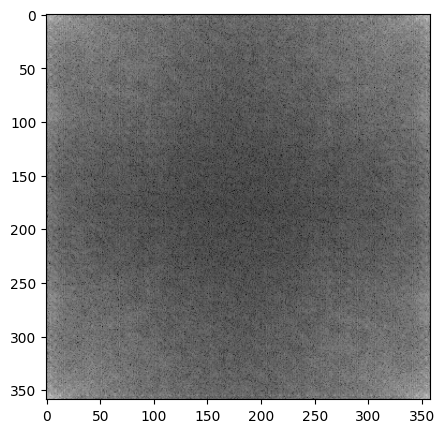

In [281]:
#(2) Fourier transformation
f= np.fft.fft2(gray)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs (f)), cmap ='gray')

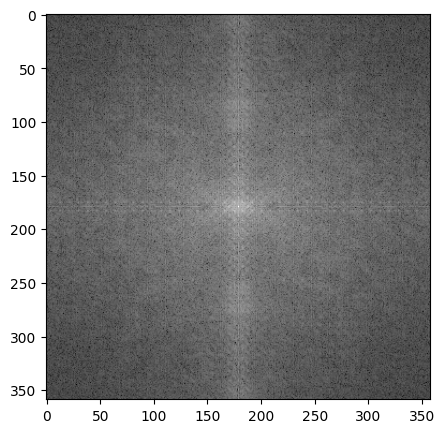

In [282]:
#(3) frequency shift
shifted_f = np. fft.fftshift(f)
plt.figure(figsize = (5, 5))
plt.imshow(np.log(np.abs (shifted_f)), cmap='gray')

<ipython-input-283-235c0bbd875e>:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(high_pass)), cmap='gray')


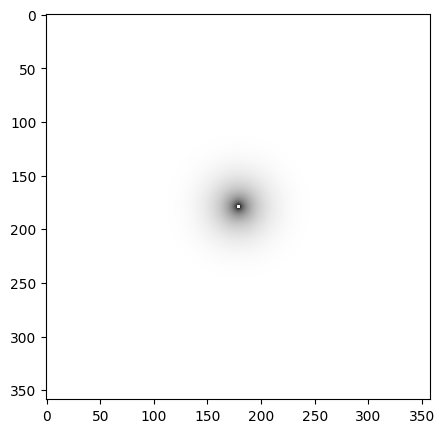

In [283]:
# (4) high pass frequency
high_pass = np.ones(shape=gray.shape)
# Get the center of the image
xc = gray.shape[1] // 2
yc = gray.shape[0] // 2
# Radius: Do
sigma = 25
# Calculate the distance from each point to the center using the formula: sqrt((x-xc)**2 + (y-yc)**2)
def d(x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

for x in range(gray.shape[1]):
    for y in range(gray.shape[0]):
        high_pass[y, x] = 1 - np.exp(-d(x, y)**2 / (2 * sigma**2))  # Modify the filter equation

f = shifted_f * high_pass
plt.figure(figsize=(5, 5))
plt.imshow(np.log(np.abs(high_pass)), cmap='gray')

<ipython-input-284-3f831ad3f181>:4: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs (f)), cmap='gray')


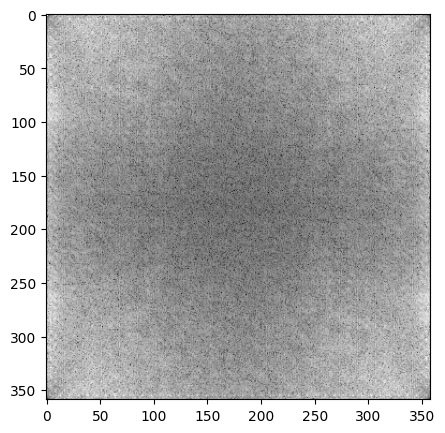

In [284]:
#(5) invert shift
plt.figure(figsize = (5, 5))
f = np.fft.ifftshift(f)
plt.imshow(np.log(np.abs (f)), cmap='gray')

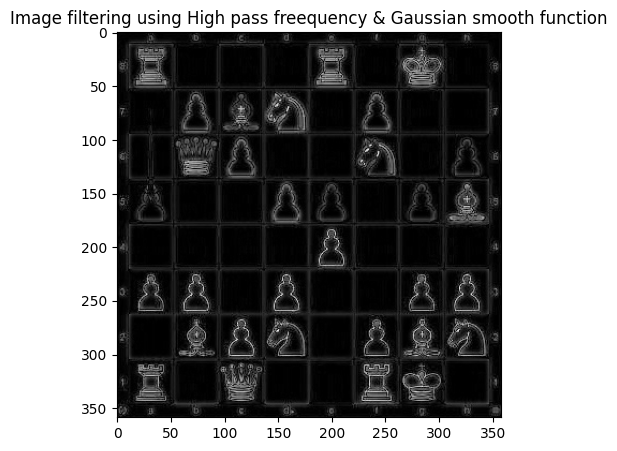

In [285]:
#(6) invert fourier transform
new_img = np.abs (np.fft.ifft2(f))
plt.figure(figsize = (5, 5))
plt.title("Image filtering using High pass freequency & Gaussian smooth function")
plt.imshow(new_img, cmap = 'gray')

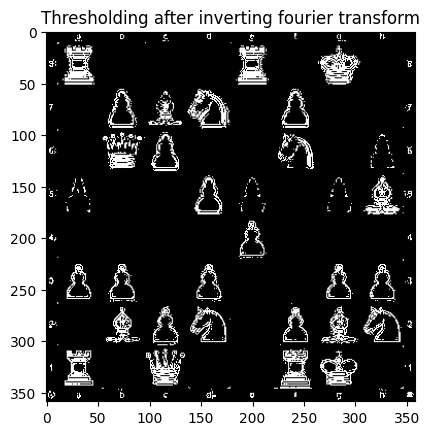

In [286]:
# Đặt ngưỡng
thresh = 47

# Sử dụng hàm cv2.threshold() để loại bỏ những điểm có độ sáng nhỏ hơn ngưỡng
ret, thresh_img_GSF = cv2.threshold(new_img, thresh, 255, cv2.THRESH_BINARY)

# Hiển thị ảnh sau khi đã áp dụng ngưỡng
plt.title("Thresholding after inverting fourier transform")
plt.imshow(thresh_img_GSF, cmap = 'gray')

In [287]:
# # Erosion followed by dilation để lọc gợn ảnh
# kernel = np.ones((2,1),np.uint8) # Lọc theo chiều ngang
# opening1 = cv2.morphologyEx(thresh_img_GSF, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((1,2),np.uint8) # Lọc theo chiều dọc
# opening2 = cv2.morphologyEx(thresh_img_GSF, cv2.MORPH_OPEN, kernel)
# # Cộng 2 ảnh vừa lọc
# opening_GSF = cv2.addWeighted(opening1, 0.5, opening2, 0.5, 0.0)
# plt.title("Erosion followed by dilation")
# plt.imshow(opening_GSF, cmap = 'gray')

Comparison between image high pass filtering using Distance smooth function and Gaussian smooth function


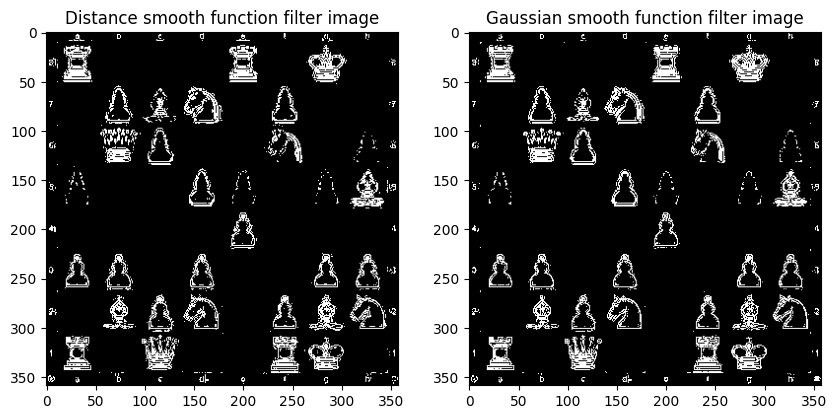

In [288]:
print("Comparison between image high pass filtering using Distance smooth function and Gaussian smooth function")
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Distance smooth function filter image")
plt.imshow(thresh_img_DSF, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Gaussian smooth function filter image")
plt.imshow(thresh_img_GSF, cmap = 'gray')

Comparison between image low pass filtering using Distance smooth function and Gaussian smooth function
With same radius


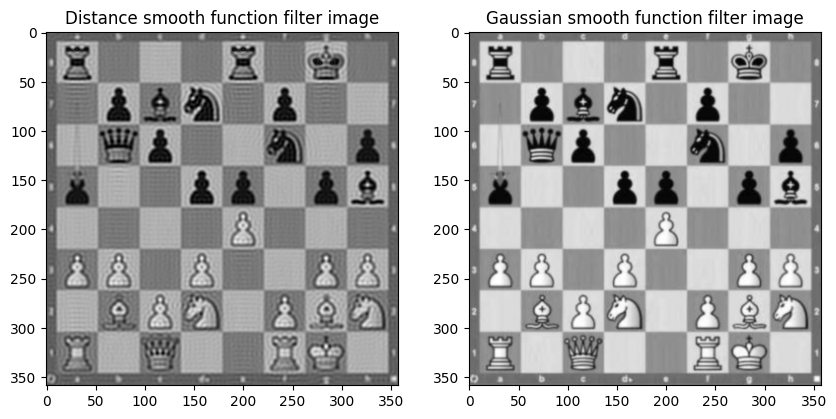

In [289]:
print("Comparison between image low pass filtering using Distance smooth function and Gaussian smooth function")
print("With same radius")
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Distance smooth function filter image")
plt.imshow(new_img_DSF, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Gaussian smooth function filter image")
plt.imshow(new_img_GSF, cmap = 'gray')